In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-69lww8ai
  Running command git clone -q https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-69lww8ai
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4304 sha256=1fcae6e672d0a1ac7490773f423d02fddb97d95eb8948eeff43899bec8e9a6b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-kfo0v_0g/wheels/f3/08/cc/e2b5b0e1c92df07dbb50a6f024a68ce090f5e7b2316b41756d
Successfully built NVCCPlugin


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [ ]:
%%cu
//DENEMEEEEEE
#include <cstdio>
#include <iostream>
 
    using namespace std;
 
__global__ void maxi(int* a, int* b, int n)
{
    int block = 256 * blockIdx.x;
    int max = 0;
 
    for (int i = block; i < min(256 + block, n); i++) {
 
        if (max < a[i]) {
            max = a[i];
        }
    }
    b[blockIdx.x] = max;
}
 
int main()
{
 
    int n;
    n = 3 >> 2;
    int a[n];
 
    for (int i = 0; i < n; i++) {
        a[i] = rand() % n;
        cout << a[i] << "\t";
    }
 
    cudaEvent_t start, end;
    int *ad, *bd;
    int size = n * sizeof(int);
    cudaMalloc(&ad, size);
    cudaMemcpy(ad, a, size, cudaMemcpyHostToDevice);
    int grids = ceil(n * 1.0f / 256.0f);
    cudaMalloc(&bd, grids * sizeof(int));
 
    dim3 grid(grids, 1);
    dim3 block(1, 1);
 
    cudaEventCreate(&start);
    cudaEventCreate(&end);
    cudaEventRecord(start);
 
    while (n > 1) {
        maxi<<<grids, block>>>(ad, bd, n);
        n = ceil(n * 1.0f / 256.0f);
        cudaMemcpy(ad, bd, n * sizeof(int), cudaMemcpyDeviceToDevice);
    }
 
    cudaEventRecord(end);
    cudaEventSynchronize(end);
 
    float time = 0;
    cudaEventElapsedTime(&time, start, end);
 
    int ans[2];
    cudaMemcpy(ans, ad, 4, cudaMemcpyDeviceToHost);
 
    cout << "The maximum element is : " << ans[0] << endl;
 
    cout << "The time required : ";
    cout << time << endl;
}

The maximum element is : -1761187824
The time required : 0.002368



In [ ]:
%%cu
#include<stdio.h>
#include<stdlib.h>
#include<math.h>
#define SIZE 850000
__global__ void device_add(int *a, int *b,int *c ){
    
    int index= threadIdx.x+blockIdx.x*blockDim.x;
    c[index]=a[index]+b[index];
    //c[blockIdx.x]=a[blockIdx.x]+b[blockIdx.x];

}
void fill_array(int *arr){
    for(int i=0;i<SIZE;i++){
        arr[i]=rand()%SIZE;
    }
}
void print_output(int *a, int *b, int *c){
    for(int i=0;i<SIZE;i++){
        printf("%d + %d = %d\n",a[i],b[i],c[i]);
    }
}
int main(void){
    
    int *arr1,*arr2,*arr3;
    int *device_arr1, *device_arr2, *device_arr3;
    int size= SIZE*sizeof(int);

    // cpudaki arrayler için yer ayır.
    
    arr1=(int *)malloc(size);
    fill_array(arr1);
    arr2=(int *)malloc(size);
    fill_array(arr2);
    arr3=(int *)malloc(size);
    
    // gpudaki arrayler için yer ayır
    cudaMalloc((void**)&device_arr1,size);
    cudaMalloc((void**)&device_arr2,size);
    cudaMalloc((void**)&device_arr3,size);

    // cpudaki arraylerin içeriğini gpudaki arraylere kopyala
    cudaMemcpy(device_arr1,arr1,size,cudaMemcpyHostToDevice);
    cudaMemcpy(device_arr2,arr2,size,cudaMemcpyHostToDevice);

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    cudaEventRecord(start);
    device_add<<<ceil(SIZE/128),128>>>(device_arr1,device_arr2,device_arr3);
    cudaEventRecord(stop);
    
    cudaMemcpy(arr3,device_arr3,size,cudaMemcpyDeviceToHost);
    cudaEventSynchronize(stop);
    float result=0;
    cudaEventElapsedTime(&result,start,stop);
    
   // print_output(arr1,arr2,arr3);

    free(arr1);
    free(arr2);
    free(arr3);
    cudaFree(device_arr1);
    cudaFree(device_arr2);
    cudaFree(device_arr3);
     printf("%f", result);
    
    return 0;
}


0.048928


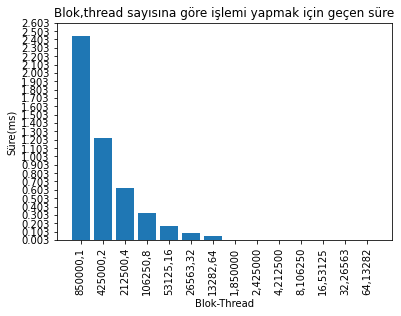

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x_axis = ["850000,1",
"425000,2",
"212500,4",
"106250,8",
"53125,16",
"26563,32",
"13282,64",
"1,850000",
"2,425000",
"4,212500",
"8,106250",
"16,53125",
"32,26563",
"64,13282",
]
y_axis = [2.440832,
1.227072,
0.627776,
0.324320,
0.167968,
0.089536,
0.049952,
0.002944,
0.002912,
0.002944,
0.002912,
0.002944,
0.002912,
0.002912,

]


plt.bar(x_axis, y_axis)
plt.title('Blok,thread sayısına göre işlemi yapmak için geçen süre')
plt.xticks(rotation=90)
plt.yticks(np.arange(min(y_axis), max(y_axis)+0.25, 0.1))
plt.xlabel('Blok-Thread')
plt.ylabel('Süre(ms)')

plt.show()